In [0]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import pydotplus

import collections
from pprint import pprint
from IPython.display import display, HTML, Image


# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

print("All done")

All done


In [0]:
# Import train & test data 
train = pd.read_csv('data.csv')

In [0]:
train.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARTIAL_STATUS,OCCUPATION,RELATIONSHIP,GENDER,CAPITAL_GAIN,CAPITAL_LOSS,HOURS PER WEEK,COUNTRY,CLASS
0,66,?,107744,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,40,United-States,0
1,37,Private,106043,HS-grad,9,Married-civ-spouse,Sales,Husband,Male,0,0,40,United-States,1
2,35,Private,953588,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,1
3,20,Private,157595,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,40,United-States,0
4,33,?,207668,Bachelors,13,Never-married,?,Own-child,Male,0,0,40,United-States,0


In [0]:
train = train.replace("?", np.nan)

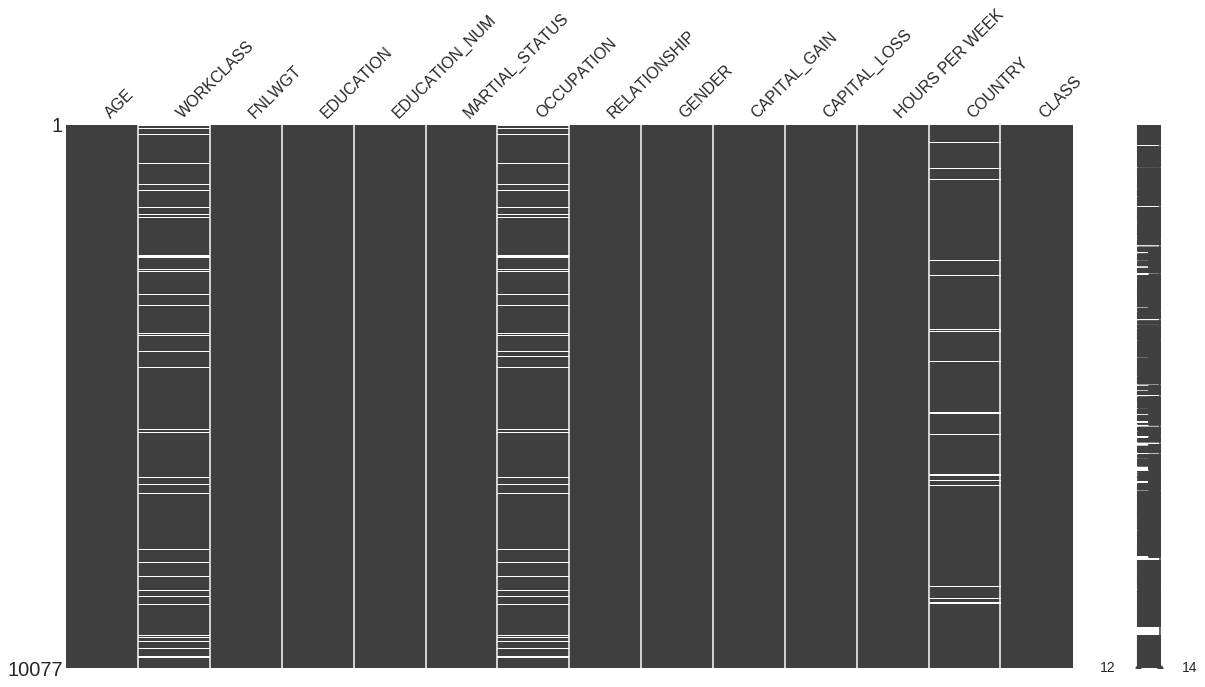

In [0]:
missingno.matrix(train, figsize = (20,10))

In [0]:
train.isnull().sum()

AGE                 0
WORKCLASS         833
FNLWGT              0
EDUCATION           0
EDUCATION_NUM       0
MARTIAL_STATUS      0
OCCUPATION        836
RELATIONSHIP        0
GENDER              0
CAPITAL_GAIN        0
CAPITAL_LOSS        0
HOURS PER WEEK      0
COUNTRY           247
CLASS               0
dtype: int64

In [0]:
df = train.dropna()

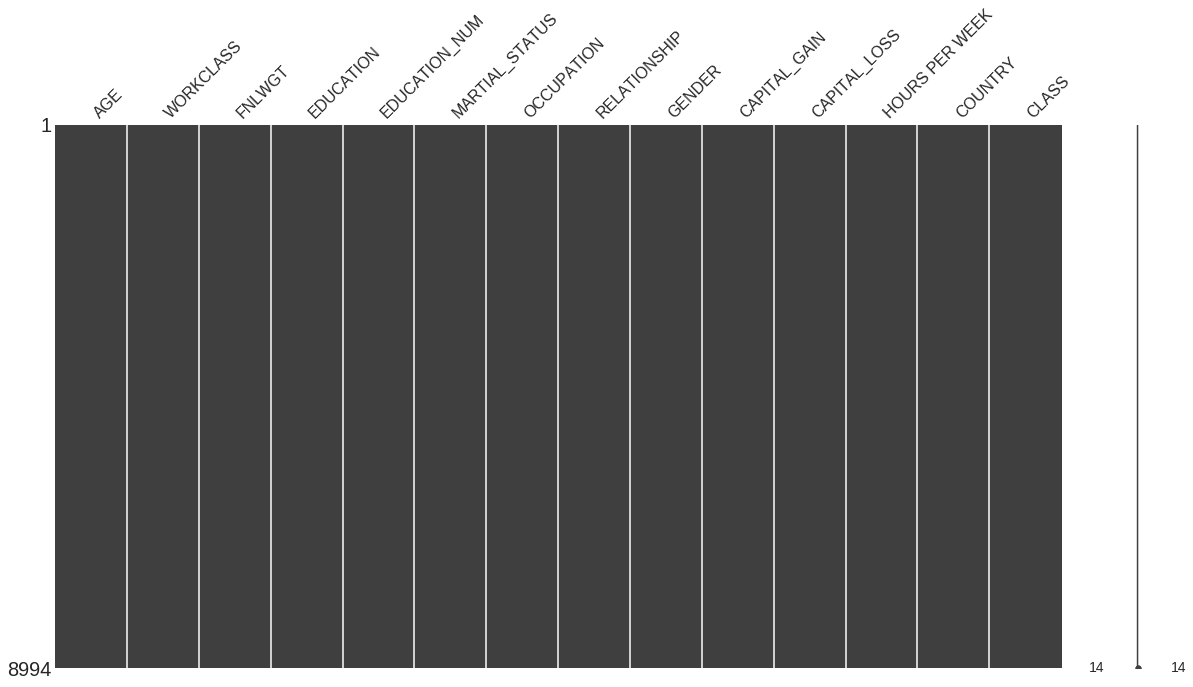

In [0]:
missingno.matrix(df, figsize = (10,10))

In [0]:
df.nunique()

AGE                 71
WORKCLASS            7
FNLWGT            7778
EDUCATION           16
EDUCATION_NUM       16
MARTIAL_STATUS       7
OCCUPATION          14
RELATIONSHIP         6
GENDER               2
CAPITAL_GAIN         1
CAPITAL_LOSS         1
HOURS PER WEEK      82
COUNTRY             40
CLASS                2
dtype: int64

In [0]:
df = df.drop(['FNLWGT'], axis=1)
df = df.drop(['CAPITAL_GAIN'], axis=1)
df = df.drop(['CAPITAL_LOSS'], axis=1)

In [0]:
# make a dataframe which only has categorical variables
dataobject=df.select_dtypes(['object'])

# Label encoding function
def labelencode(columnname):
    df[columnname] = LabelEncoder().fit_transform(df[columnname])

# applying the function to each column except the customerID
for i in range(0,len(dataobject.columns)):
    labelencode(dataobject.columns[i])

In [0]:
df.head()

,AGE,WORKCLASS,EDUCATION,EDUCATION_NUM,MARTIAL_STATUS,OCCUPATION,RELATIONSHIP,GENDER,HOURS PER WEEK,COUNTRY,CLASS
1,37,2,11,9,2,11,0,1,40,37,1
2,35,2,11,9,2,3,5,0,40,37,1
3,20,2,11,9,2,2,0,1,40,37,0
7,18,2,1,7,4,9,3,0,16,37,0
8,36,2,11,9,4,6,1,0,30,37,0


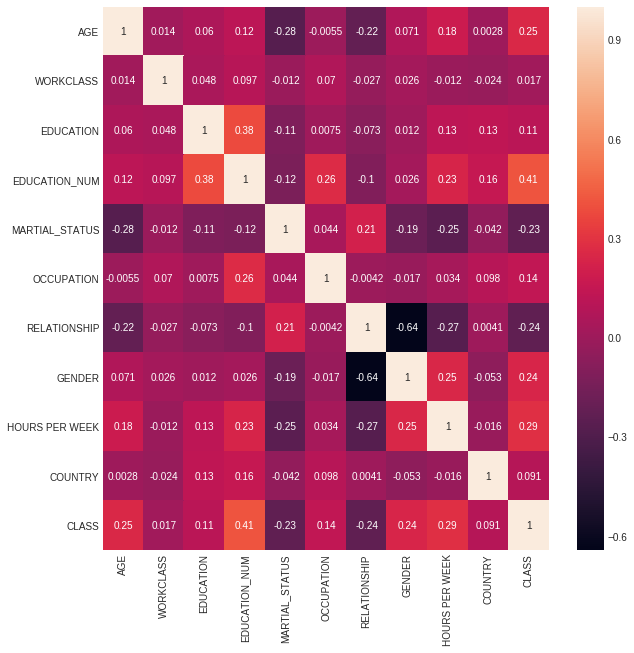

In [0]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True);

In [0]:
features = df.drop(["CLASS"], axis=1).columns

In [0]:
df_train, df_val = train_test_split(df, test_size=0.30, random_state = 42)

In [0]:
df_train.to_csv('train.csv', index=False)

In [0]:
dfd = df_val[features]
dfd['ID'] = np.arange(len(dfd))
dfd.to_csv('test.csv', index=False)

In [0]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

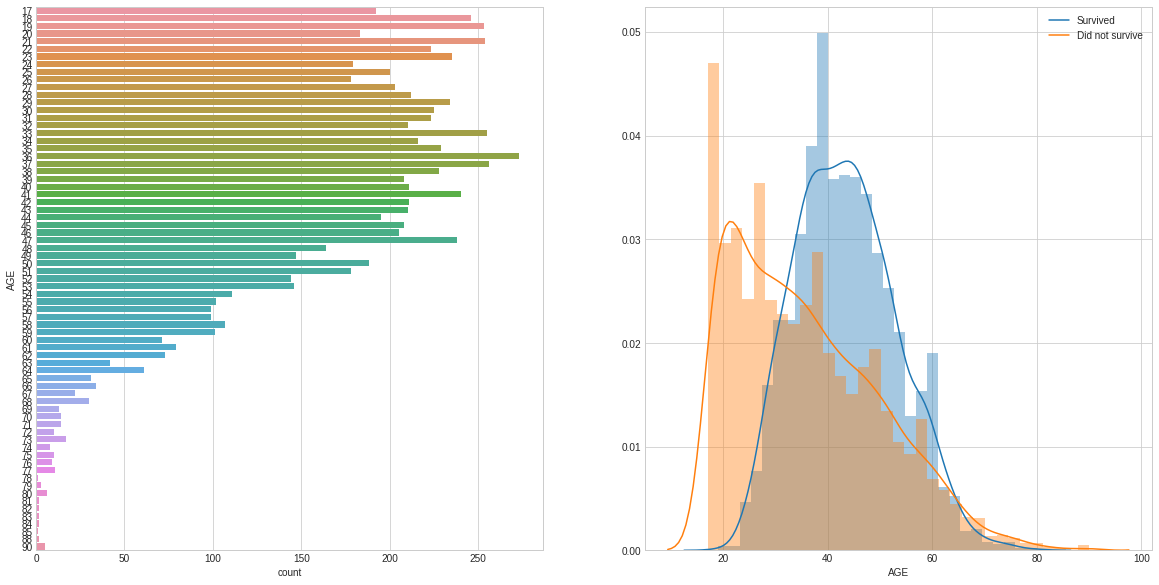

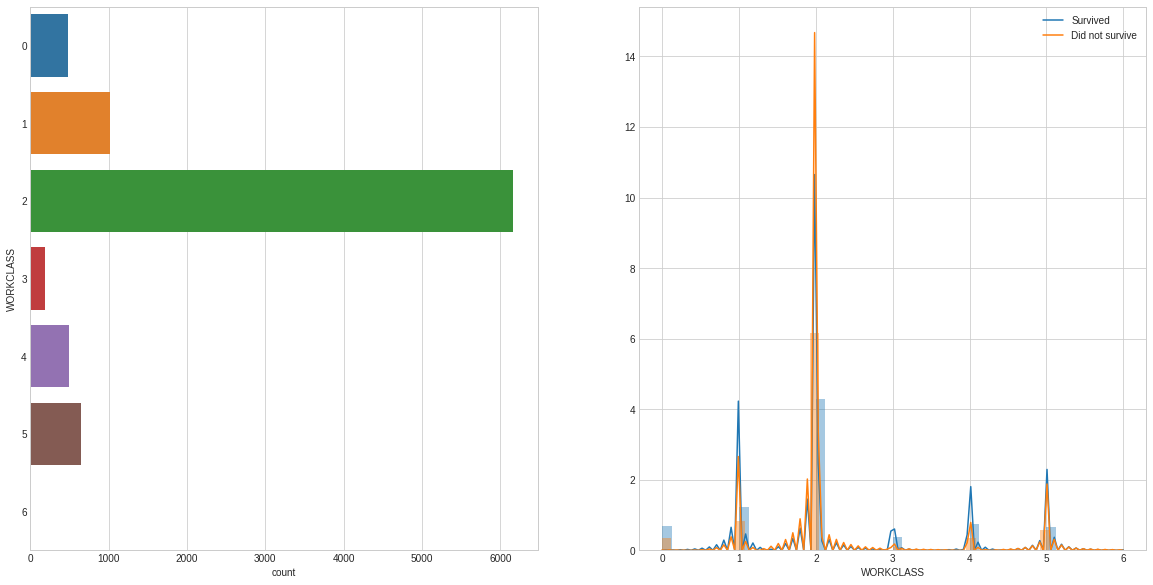

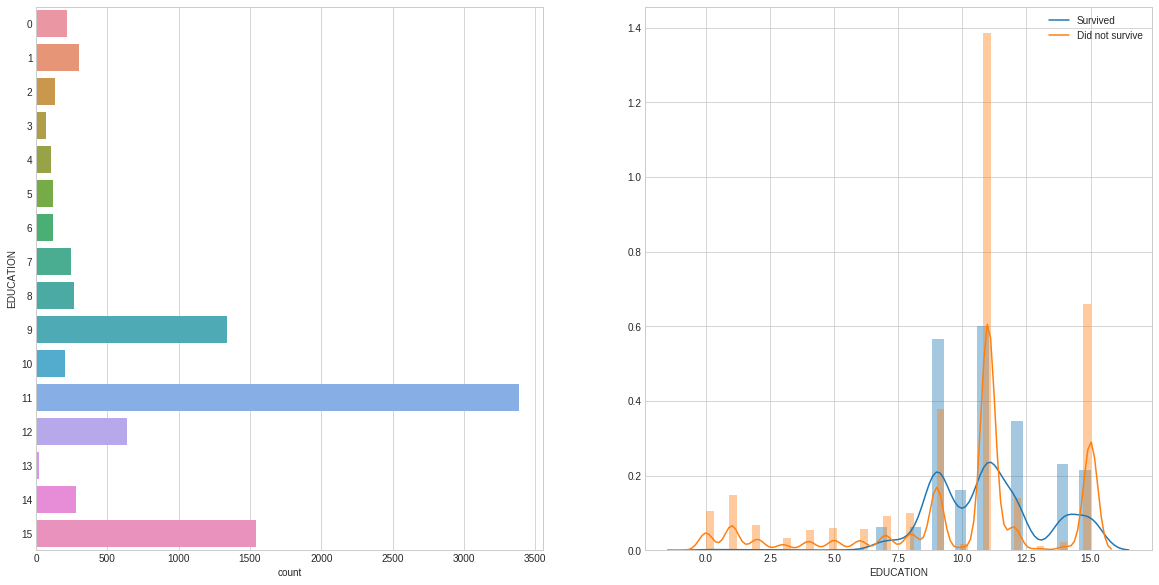

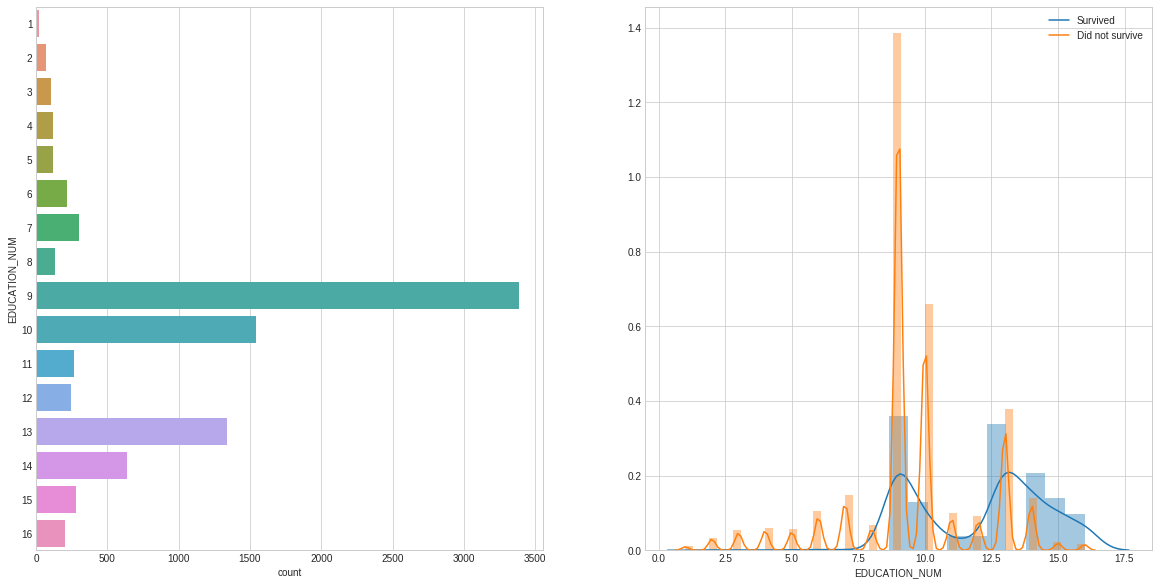

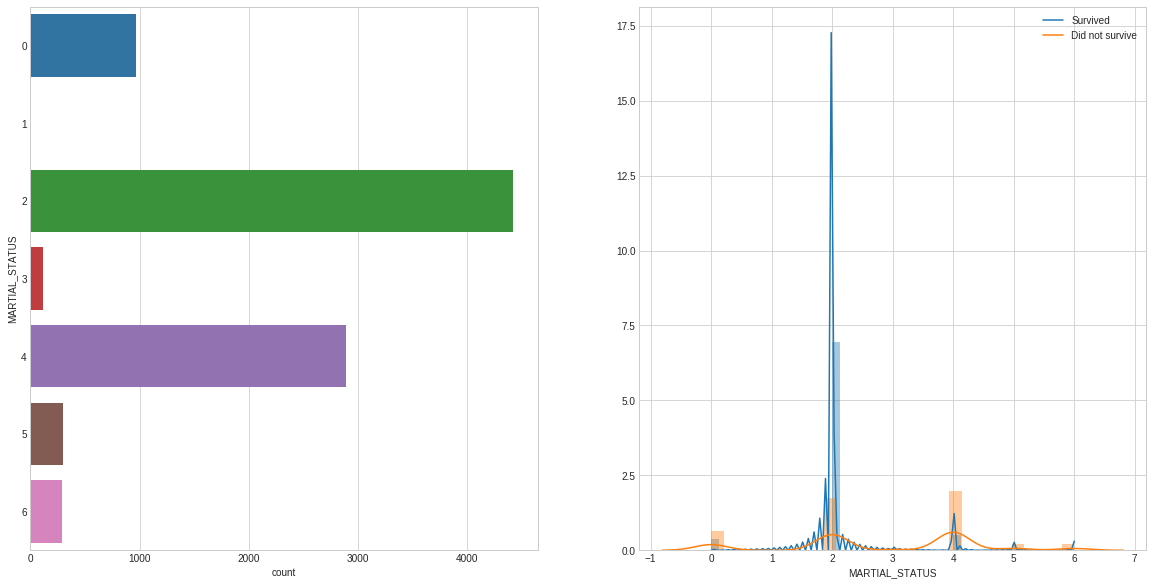

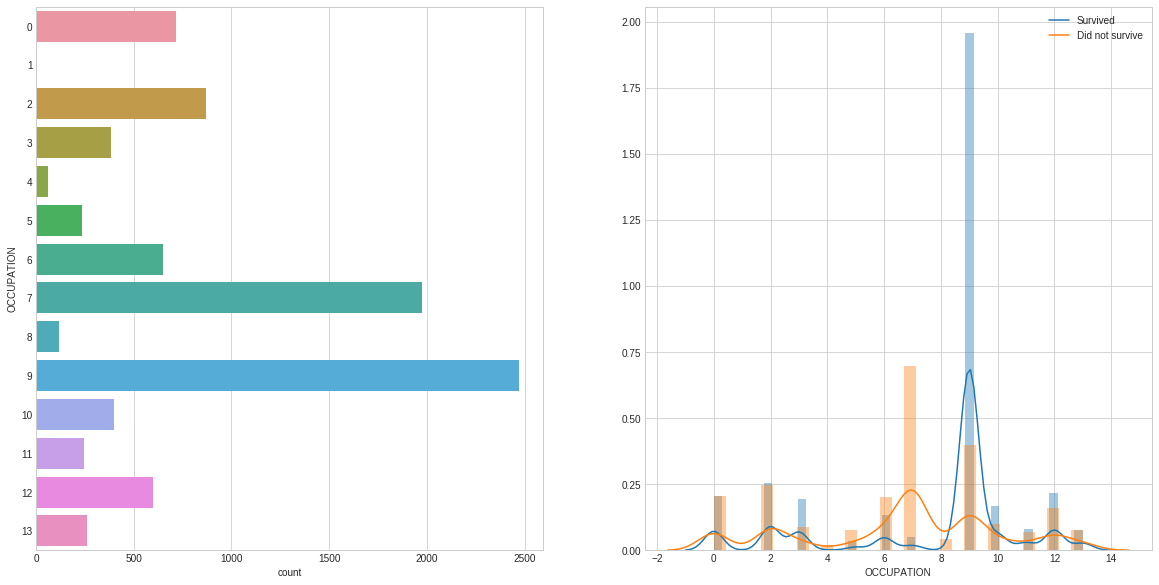

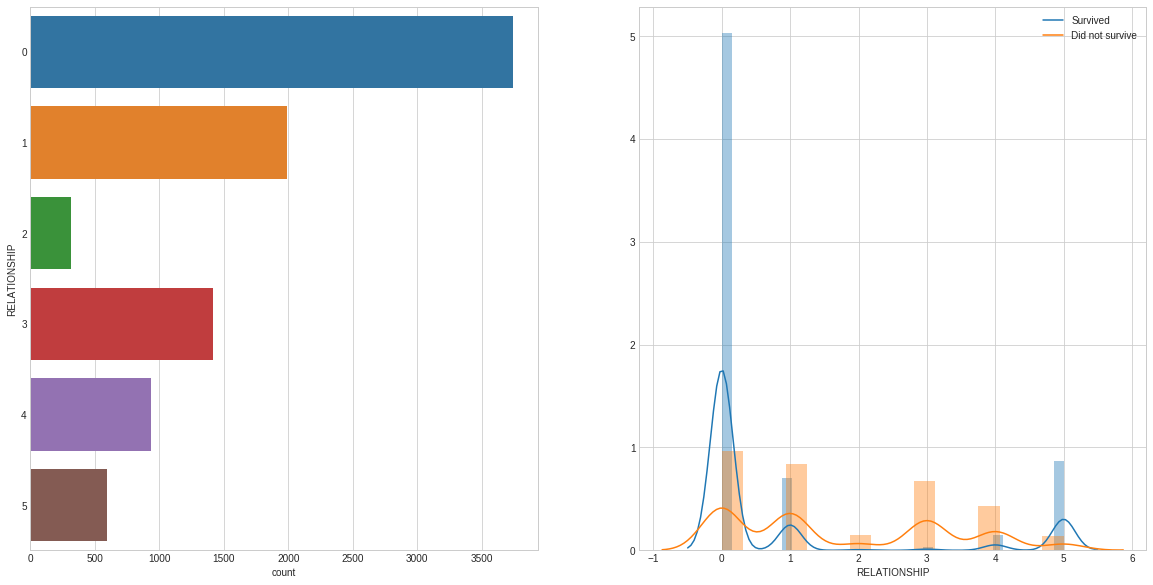

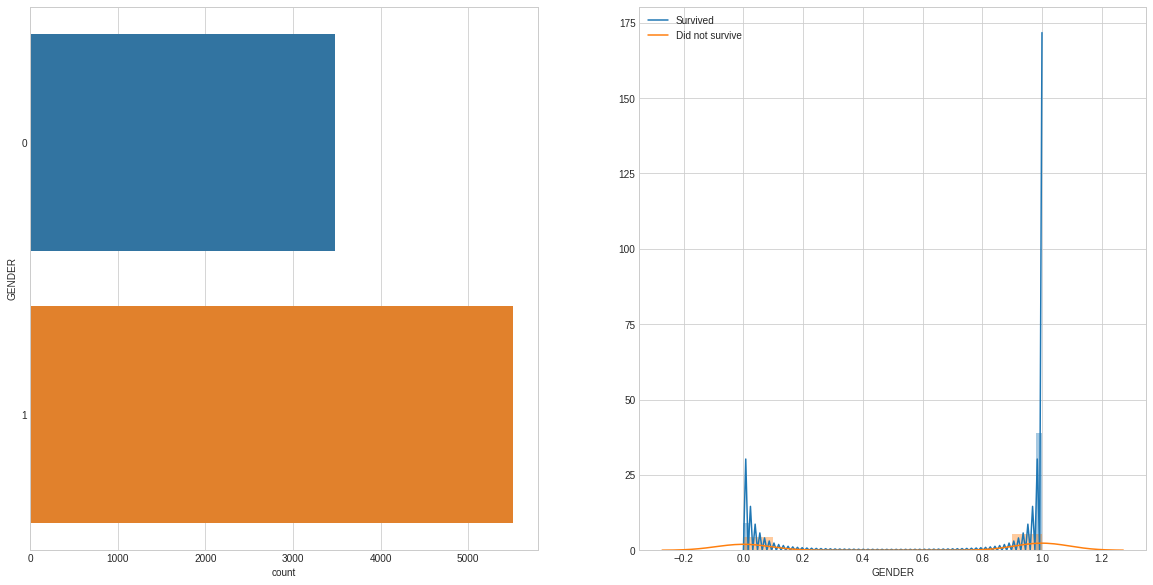

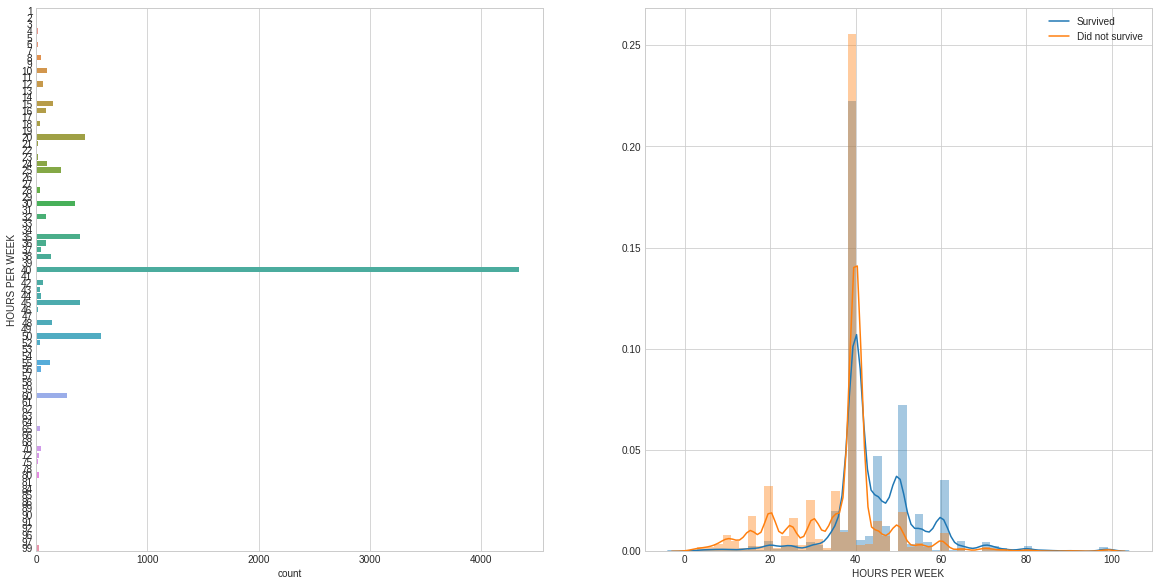

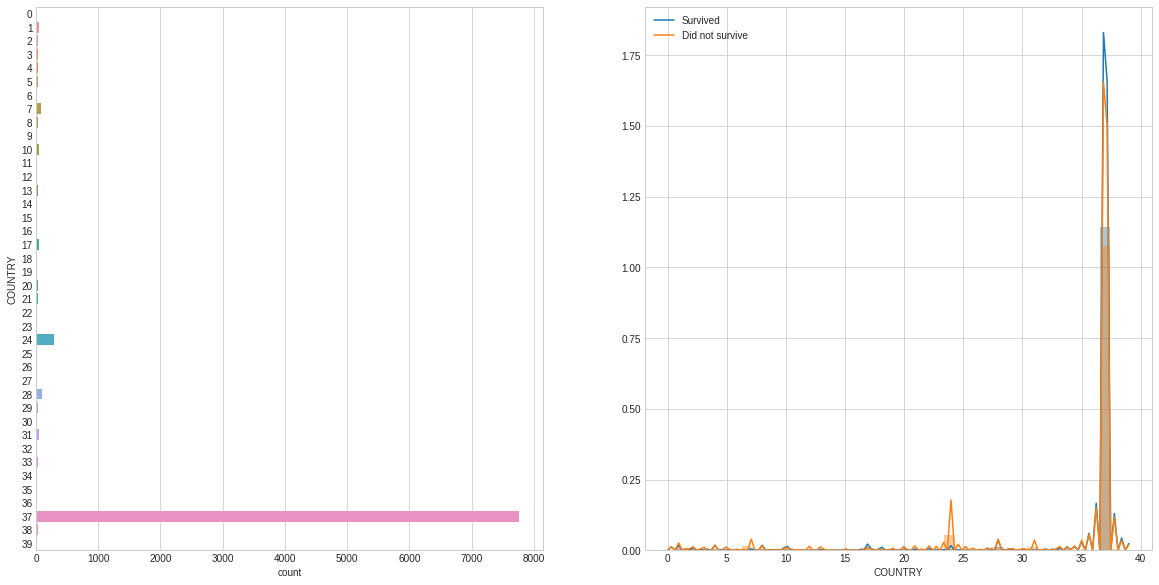

In [0]:
for i in range(0,len(df.columns)-1):
    df_bin = pd.DataFrame()
    df_bin[df.columns[i]] = df[df.columns[i]]
    plot_count_dist(df, 
                bin_df=df_bin, 
                label_column='CLASS', 
                target_column=df.columns[i], 
                figsize=(20, 10))

In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': [2,3,4, 5, 6,7,8,9],
    'max_leaf_nodes':[10,20,30],
    'n_estimators': [100, 500, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
pprint(param_grid)

{'bootstrap': [True],
 'max_features': [2, 3, 4, 5, 6, 7, 8, 9],
 'max_leaf_nodes': [10, 20, 30],
 'n_estimators': [100, 500, 1000]}


In [0]:
# Fit the grid search to the data
grid_search.fit(df_train[features], df_train["CLASS"])
pprint(grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  5.9min finished


{'bootstrap': True,
 'max_features': 5,
 'max_leaf_nodes': 30,
 'n_estimators': 500}


In [0]:
best_grid = grid_search.best_estimator_
predictions = best_grid.predict(df_val[features])

# Performance measures
score = best_grid.score(df_val[features], df_val["CLASS"])
print("Accuracy: ", score)
print(confusion_matrix(df_val["CLASS"],predictions))
print(classification_report(df_val["CLASS"],predictions))

('Accuracy: ', 0.8480918858836606)
[[1873   98]
 [ 312  416]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1971
           1       0.81      0.57      0.67       728

   micro avg       0.85      0.85      0.85      2699
   macro avg       0.83      0.76      0.79      2699
weighted avg       0.84      0.85      0.84      2699



EDUCATION_NUM     0.303672
RELATIONSHIP      0.261117
MARTIAL_STATUS    0.139814
OCCUPATION        0.104277
AGE               0.071335
Name: Feature importances, dtype: float64

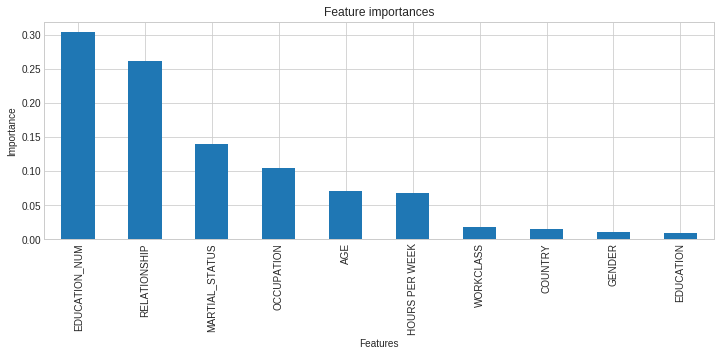

In [0]:
feat_imp = pd.Series(best_grid.feature_importances_, index=features, name='Feature importances') \
                .sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(12,4), title='Feature importances')
plt.xlabel('Features'), plt.ylabel('Importance');
feat_imp.head()